In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#write a example dataset array good with db scan
# data_example = np.array([[1, 2], [2, 2], [2, 3],[2.5,2.5],[5,7], [5,9], [6,8],[5.5,9.5],[10,10],[10,11],[11,11],[11,12],[11.5,11.5]])

data = pd.read_csv('tracks_features.csv', nrows=100)
# pca = PCA(n_components = 2)
# X_pca = pca.fit_transform(data.iloc[:,6:23])


In [60]:
data.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    object 
 1   name              100 non-null    object 
 2   album             100 non-null    object 
 3   album_id          100 non-null    object 
 4   artists           100 non-null    object 
 5   artist_ids        100 non-null    object 
 6   track_number      100 non-null    int64  
 7   disc_number       100 non-null    int64  
 8   explicit          100 non-null    bool   
 9   danceability      100 non-null    float64
 10  energy            100 non-null    float64
 11  key               100 non-null    int64  
 12  loudness          100 non-null    float64
 13  mode              100 non-null    int64  
 14  speechiness       100 non-null    float64
 15  acousticness      100 non-null    float64
 16  instrumentalness  100 non-null    float64
 17

In [62]:
#preprocessing data
# columns_to_scale = ['danceability', 'energy']
# scaler = StandardScaler()
# scaler.fit(data[columns_to_scale])
# data_scaled = data.copy()
# data_scaled[columns_to_scale] = scaler.transform(data[columns_to_scale])

columns_to_scale = ['danceability', 'energy']
scaler = MinMaxScaler()
scaler.fit(data[columns_to_scale])
data_scaled = data.copy()
data_scaled[columns_to_scale] = scaler.transform(data[columns_to_scale])


# data_pca_scaled = scaler.fit_transform(X_pca)

In [63]:
X = data_scaled.iloc[:, [9,10]].values
X
# X = data_pca_scaled
# X

array([[0.34829443, 1.        ],
       [0.57989228, 0.97535211],
       [0.07001795, 0.99061033],
       [0.29443447, 0.9870892 ],
       [0.26929982, 0.94248826],
       [0.03949731, 0.84741784],
       [0.25314183, 0.99765258],
       [0.00179533, 0.87676056],
       [0.2962298 , 0.88732394],
       [0.30879713, 0.86267606],
       [0.32315978, 0.67840376],
       [0.22082585, 0.98474178],
       [0.36265709, 0.8556338 ],
       [0.32495512, 0.76643192],
       [0.47755835, 0.84037559],
       [0.43087971, 0.47769953],
       [0.25493716, 0.79812207],
       [0.53500898, 0.75      ],
       [0.24236984, 0.81807512],
       [0.43806104, 0.73826291],
       [0.4470377 , 0.5528169 ],
       [0.40035907, 0.57159624],
       [0.91741472, 0.91197183],
       [0.55834829, 0.97652582],
       [0.51885099, 0.76877934],
       [0.67324955, 0.51760563],
       [1.        , 0.79694836],
       [0.90843806, 0.5786385 ],
       [0.59066427, 0.93309859],
       [0.72351885, 0.89788732],
       [0.

Calculate the parameters

In [64]:
from sklearn.neighbors import NearestNeighbors # importing the library
no_neighbors = 4 # setting the number of neighbors
neighb = NearestNeighbors(n_neighbors=no_neighbors) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X) # fitting the data to the object
distances,indices=nbrs.kneighbors(X) # finding the nearest neighbours

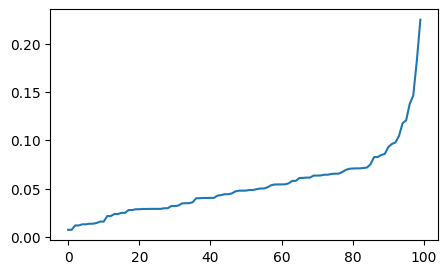

In [65]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [66]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(distances)+1), y = distances, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
kneedle.knee_y

0.09618935097178463

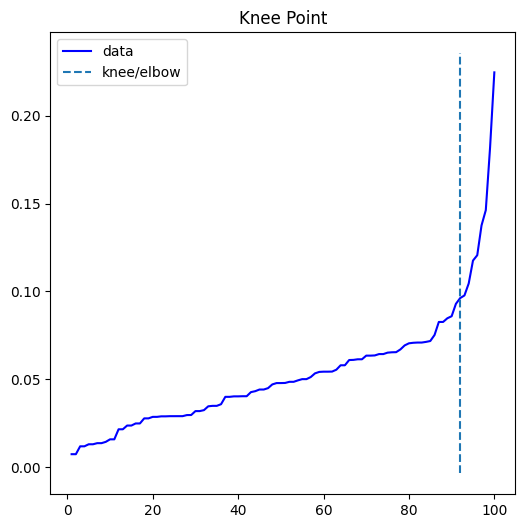

In [67]:
kneedle.plot_knee()
plt.show()

minPoints = 18
Eps = 5

Implementing DBScan

In [68]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 0.096, min_samples = 4).fit(X) # fitting the model
Y = dbscan.fit_predict(X) # getting the predicted values
labels = dbscan.labels_ # getting the labels
labels


array([ 1,  0,  7,  1,  1,  7,  1,  7,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  4,  0,  1,  1,  4,  2,  0,  0,  1, -1,  2,  1,
        2,  0,  0,  2,  3,  3,  1,  4, -1,  2,  5,  4,  1,  1,  5,  6,  5,
        1,  5,  5,  6,  5,  5, -1,  1,  1,  3, -1,  5, -1,  6, -1,  3,  3,
        5,  1,  6,  5,  1,  3,  6, -1, -1,  2,  2,  5, -1,  1,  5,  5, -1,
       -1, -1, -1,  1,  1, -1,  1,  7,  1,  0,  0,  0,  0,  0,  0],
      dtype=int64)

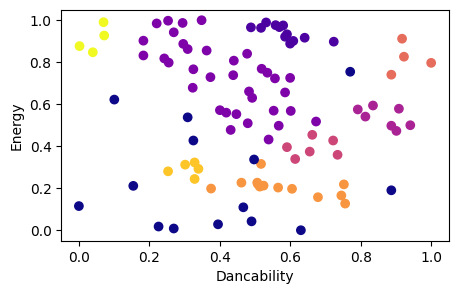

In [69]:
# Plot the clusters
plt.scatter(X[:, 0], X[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Dancability") # X-axis label
plt.ylabel("Energy") # Y-axis label
plt.show() # showing the plot

Davies Bouldin Index

In [71]:
davies_bouldin_score(X, labels)

1.6126341902821975

Silhouette

In [70]:
silhouette_score(X, labels)


0.1913279560112543